# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0: "City"})
city_df[['Lat', 'Lng', "Country", "Max Temp", 
                        "Humidity", "Cloudiness", "Wind Speed", "Date"]]=""

url = 'https://api.openweathermap.org/data/2.5/weather?'
params = {'appid': weather_api_key, "units": "imperial"}

response = requests.get(url, params).json()
response

print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in city_df.iterrows():
    city = row['City']
    params['q'] = city
    print(f"Processing Record {index}: | {city}")
    try:
        response = requests.get(url, params).json()
        row['Lat'] = response['coord']['lat']
        row['Lng'] = response['coord']['lon']
        row['Country']=response['sys']['country']
        row['Max Temp']=response['main']['temp_max']
        row['Humidity']=response['main']['humidity']
        row['Cloudiness']=response['clouds']['all']
        row['Wind Speed']=response['wind']['speed']
        row['Date']=response['dt']
                   
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 0: | itarema
Processing Record 1: | port alfred
Processing Record 2: | avarua
Processing Record 3: | hatillo
Processing Record 4: | wulanhaote
City not found. Skipping...
Processing Record 5: | cidreira
Processing Record 6: | victoria
Processing Record 7: | arraial do cabo
Processing Record 8: | thompson
Processing Record 9: | luderitz
Processing Record 10: | kodinsk
Processing Record 11: | busselton
Processing Record 12: | albany
Processing Record 13: | mobaye
Processing Record 14: | khatanga
Processing Record 15: | nikolskoye
Processing Record 16: | maniitsoq
Processing Record 17: | bluff
Processing Record 18: | kapaa
Processing Record 19: | mar del plata
Processing Record 20: | tefe
Processing Record 21: | mindelo
Processing Record 22: | nouadhibou
Processing Record 23: | road town
Processing Record 24: | kruisfontein
Processing Record 25: | saint george
Processing Record 26: | guerrero negro
Processing Record 

Processing Record 225: | hauknes
Processing Record 226: | grindavik
Processing Record 227: | buraydah
Processing Record 228: | san juan
Processing Record 229: | balclutha
Processing Record 230: | odweyne
Processing Record 231: | barrow
Processing Record 232: | constitucion
Processing Record 233: | marovoay
Processing Record 234: | bengkulu
Processing Record 235: | banda aceh
Processing Record 236: | skagen
Processing Record 237: | tual
Processing Record 238: | san pedro
Processing Record 239: | falealupo
City not found. Skipping...
Processing Record 240: | hargeysa
Processing Record 241: | marsa matruh
Processing Record 242: | ponta do sol
Processing Record 243: | broken hill
Processing Record 244: | viligili
City not found. Skipping...
Processing Record 245: | posevnaya
Processing Record 246: | vaitupu
City not found. Skipping...
Processing Record 247: | kapit
Processing Record 248: | rungata
City not found. Skipping...
Processing Record 249: | salatiga
Processing Record 250: | neryun

Processing Record 446: | puerto madero
Processing Record 447: | inderborskiy
City not found. Skipping...
Processing Record 448: | havre-saint-pierre
Processing Record 449: | radovis
Processing Record 450: | yekaterinovka
Processing Record 451: | mergui
City not found. Skipping...
Processing Record 452: | lashio
Processing Record 453: | portland
Processing Record 454: | ipueiras
Processing Record 455: | manta
Processing Record 456: | kavaratti
Processing Record 457: | qui nhon
Processing Record 458: | la paz
Processing Record 459: | roebourne
Processing Record 460: | chumikan
Processing Record 461: | kalmunai
Processing Record 462: | ahumada
City not found. Skipping...
Processing Record 463: | lebowakgomo
Processing Record 464: | laguna
Processing Record 465: | ascension
Processing Record 466: | wa
City not found. Skipping...
Processing Record 467: | bayan
Processing Record 468: | livingston
Processing Record 469: | debre birhan
Processing Record 470: | pochutla
Processing Record 471: |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df = city_df.dropna()

city_df.to_csv(output_data_file)
city_df.head()

,City,Lat,Lng,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,itarema,-2.9248,-39.9167,BR,81.64,78.0,100.0,4.41,1649769675
1,port alfred,-33.5906,26.8910,ZA,68.18,82.0,100.0,5.99,1649769860
2,avarua,-21.2078,-159.7750,CK,78.85,89.0,75.0,4.61,1649769860
3,hatillo,18.4863,-66.8254,PR,83.79,74.0,6.0,7.00,1649769861
5,cidreira,-30.1811,-50.2056,BR,72.55,82.0,100.0,5.77,1649769861


In [5]:
city_df['Humidity'] = pd.to_numeric(city_df['Humidity'])
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])
city_df['Max Temp'] = pd.to_numeric(city_df['Max Temp'])
city_df['Cloudiness'] = pd.to_numeric(city_df['Cloudiness'])
city_df['Wind Speed'] = pd.to_numeric(city_df['Wind Speed'])
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,20.207926,18.509104,59.836104,68.692174,57.041739,8.838313
std,33.492112,91.474820,24.678416,22.598931,40.930190,5.992836
min,-54.800000,-179.166700,-18.080000,1.000000,0.000000,0.000000
25%,-7.950850,-65.365850,44.590000,58.000000,13.000000,4.410000
50%,25.021300,27.000000,64.510000,74.000000,71.000000,7.520000
75%,49.223900,99.500400,79.225000,85.000000,100.000000,12.740000
max,78.218600,179.316700,107.010000,100.000000,100.000000,39.120000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
print(f"Starting no. of cities: {len(city_df)}")
clean_city_df = city_df[city_df["Humidity"] <= 100]
print(f"No. of cities with humidity <=100: {len(clean_city_df)}")
clean_city_df.head()

Starting no. of cities: 632
No. of cities with humidity <=100: 575


,City,Lat,Lng,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,itarema,-2.9248,-39.9167,BR,81.64,78.0,100.0,4.41,1649769675
1,port alfred,-33.5906,26.8910,ZA,68.18,82.0,100.0,5.99,1649769860
2,avarua,-21.2078,-159.7750,CK,78.85,89.0,75.0,4.61,1649769860
3,hatillo,18.4863,-66.8254,PR,83.79,74.0,6.0,7.00,1649769861
5,cidreira,-30.1811,-50.2056,BR,72.55,82.0,100.0,5.77,1649769861


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

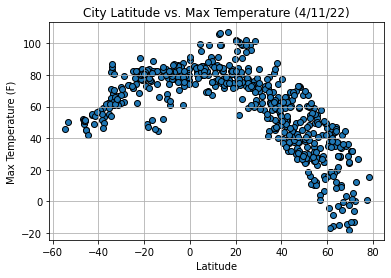

In [21]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_images/LatVTemp.png')
plt.show()


## Latitude vs. Humidity Plot

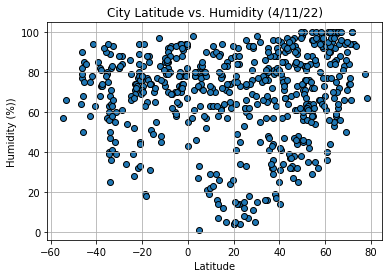

In [22]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid()
plt.savefig('output_images/LatVHum.png')
plt.show()


## Latitude vs. Cloudiness Plot

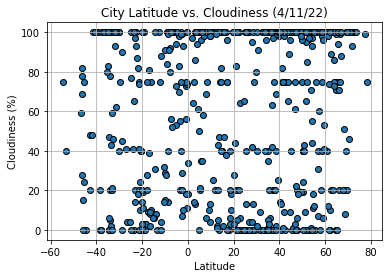

In [23]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_images/LatVCloud.png')
plt.show()


## Latitude vs. Wind Speed Plot

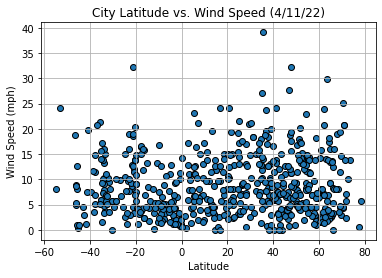

In [24]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_images/LatVWind.png')
plt.show()


## Linear Regression

In [11]:
north_city_df = clean_city_df[clean_city_df['Lat'] >= 0]
south_city_df = clean_city_df[clean_city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8412552367169714


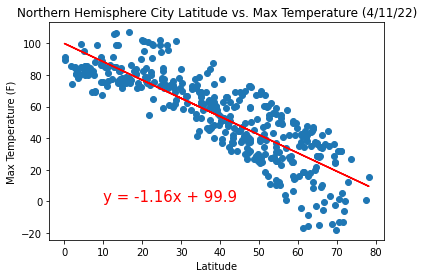

In [25]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Max Temp'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Max Temp'])
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (4/11/22)")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVTemp.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6628422318517954


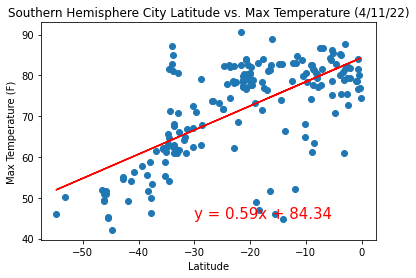

In [26]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Max Temp'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Max Temp'])
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (4/11/22)")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVTemp.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.29060161412154006


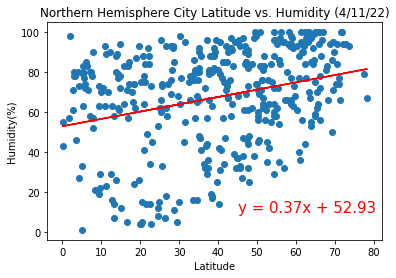

In [27]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Humidity'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Humidity'])
plt.title("Northern Hemisphere City Latitude vs. Humidity (4/11/22)")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVHumid.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.1967962951382944


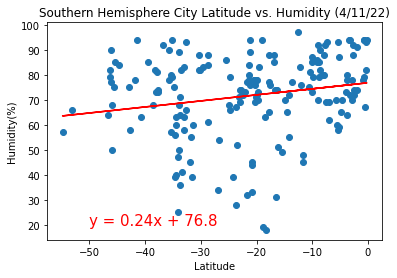

In [28]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Humidity'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Humidity'])
plt.title("Southern Hemisphere City Latitude vs. Humidity (4/11/22)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVHumid.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1701197426053123


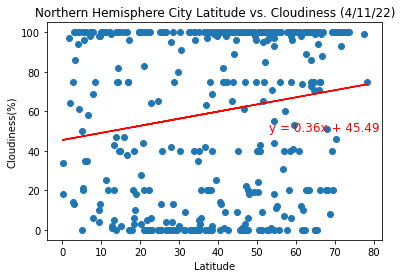

In [29]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Cloudiness'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Cloudiness'])
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (4/11/22)")
plt.annotate(line_eq,(53,50),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVCloud.png')
plt.show()


The r-value is 0.12528480581150334


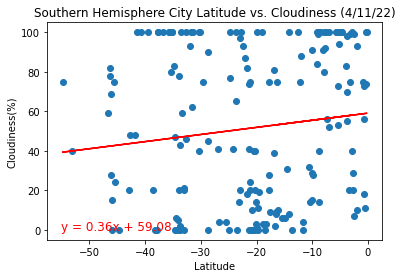

In [30]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Cloudiness'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Cloudiness'])
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (4/11/22)")
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVCloud.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00520623769623819


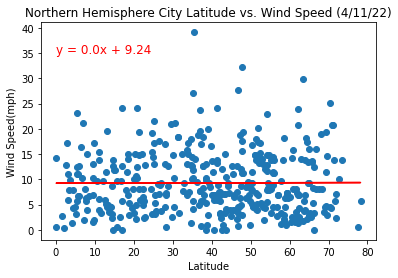

In [31]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Wind Speed'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Wind Speed'])
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (4/11/22)")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVWind.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.25545719041762993


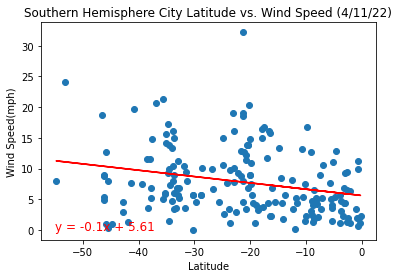

In [32]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Wind Speed'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Wind Speed'])
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (4/11/22)")
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVWind.png')
plt.show()
